In [1]:
import numpy as np

# Define a random variable X and its PMF
X_values = np.array([2, 3, 4, 5])
P_X = np.array([0.1, 0.2, 0.3, 0.4])

# --- 1. Non-negativity ---
E_X = np.sum(X_values * P_X)
print("Expected value of X:", E_X)
print("Non-negativity check:", E_X >= 0)

# --- 2. Bounding ---
a, b = 2, 5
print(f"Bounding check: {a} <= E[X] <= {b} -->", a <= E_X <= b)

# --- 3. Constant ---
c = 7
E_c = c  # expectation of constant
print("Expected value of constant c:", E_c)

# --- 4. Expected value of a function (general) ---
# Non-linear function g(X) = X^2
g_X = X_values**2
E_gX = np.sum(g_X * P_X)
print("Expected value of g(X) = X^2:", E_gX)

# Compare with g(E[X]) to show the difference
g_EX = E_X**2
print("g(E[X]) = (E[X])^2:", g_EX)
print("Check equality (should be False):", E_gX == g_EX)

# --- 5. Linearity ---
# Linear function g(X) = 2*X + 100
a, b = 2, 100
g_X_linear = a * X_values + b
E_gX_linear = np.sum(g_X_linear * P_X)
print("Expected value of linear g(X) = 2*X+100:", E_gX_linear)

# Check linearity formula: a*E[X] + b
linear_formula = a * E_X + b
print("Using linearity formula a*E[X]+b:", linear_formula)
print("Check equality (should be True):", E_gX_linear == linear_formula)


Expected value of X: 4.0
Non-negativity check: True
Bounding check: 2 <= E[X] <= 5 --> True
Expected value of constant c: 7
Expected value of g(X) = X^2: 17.0
g(E[X]) = (E[X])^2: 16.0
Check equality (should be False): False
Expected value of linear g(X) = 2*X+100: 108.0
Using linearity formula a*E[X]+b: 108.0
Check equality (should be True): True


In [2]:
# Define the random variable X and its probabilities
X_values = [2, 3, 4, 5]
P_X = [0.1, 0.2, 0.3, 0.4]

# Define the function g(X) that maps X to Y
def g(x):
    if x in [2, 3]:
        return 3
    elif x in [4, 5]:
        return 4

# Step 1: Compute Y values and probability for each Y
Y_values = [g(x) for x in X_values]

# Step 2: Using the expected value rule (sum over X)
E_Y_rule = sum(g(x) * p for x, p in zip(X_values, P_X))
print(f"Expected value of Y (using X and expected value rule): {E_Y_rule}")

# Step 3: Compute probabilities of Y
from collections import defaultdict

P_Y = defaultdict(float)
for x, p in zip(X_values, P_X):
    P_Y[g(x)] += p

# Step 4: Using definition (sum over Y)
E_Y_def = sum(y * prob for y, prob in P_Y.items())
print(f"Expected value of Y (using definition over Y): {E_Y_def}")

# Step 5: Print probabilities of Y
print("Probabilities of Y:")
for y, prob in P_Y.items():
    print(f"P(Y={y}) = {prob}")


Expected value of Y (using X and expected value rule): 3.7
Expected value of Y (using definition over Y): 3.7
Probabilities of Y:
P(Y=3) = 0.30000000000000004
P(Y=4) = 0.7


In [14]:
# Bernoulli Random Variable (0 or 1)
# Meaning: One trial, success or failure.
# Example: Coin flip
# 1 = success
# 0 = failure

p = 0.6  # probability of success

# simulate Bernoulli trials
samples = np.random.binomial(1, p, size=100_000)

# expected value
print("Bernoulli")
print("Theoretical E[X] =", p)
print("Simulated mean  =", samples.mean())


Bernoulli
Theoretical E[X] = 0.6
Simulated mean  = 0.59691


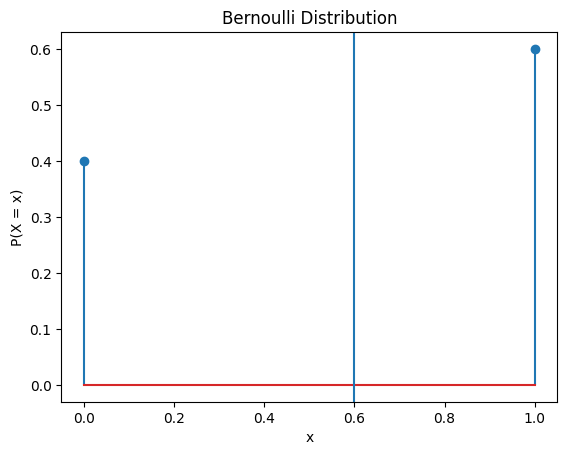

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Bernoulli parameter
p = 0.6

x = np.array([0, 1])
pmf = np.array([1 - p, p])
E = np.sum(x * pmf)

plt.stem(x, pmf)
plt.axvline(E)
plt.title("Bernoulli Distribution")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.show()


In [7]:
# Discrete Uniform Random Variable
# Meaning: All values equally likely.
# Example: Fair die {1,2,3,4,5,6}

# simulate rolling a fair die
samples = np.random.randint(1, 7, size=100_000)

# expected value
theoretical_mean = (1 + 6) / 2

print("\nDiscrete Uniform")
print("Theoretical E[X] =", theoretical_mean)
print("Simulated mean  =", samples.mean())



Discrete Uniform
Theoretical E[X] = 3.5
Simulated mean  = 3.50367


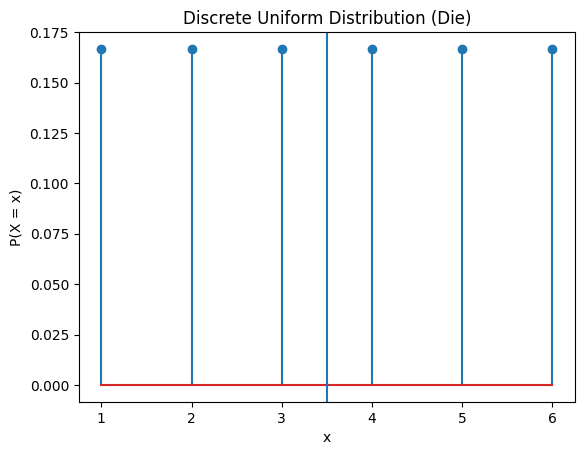

In [18]:
x = np.arange(1, 7)
pmf = np.ones(6) / 6
E = np.sum(x * pmf)

plt.stem(x, pmf)
plt.axvline(E)
plt.title("Discrete Uniform Distribution (Die)")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.show()


In [8]:
# Binomial Random Variable
# Meaning: Number of successes in n independent Bernoulli trials
# Example: Number of heads in 10 coin flips

n = 10      # number of trials
p = 0.5     # probability of success

samples = np.random.binomial(n, p, size=100_000)

print("\nBinomial")
print("Theoretical E[X] =", n * p)
print("Simulated mean  =", samples.mean())



Binomial
Theoretical E[X] = 5.0
Simulated mean  = 4.9973


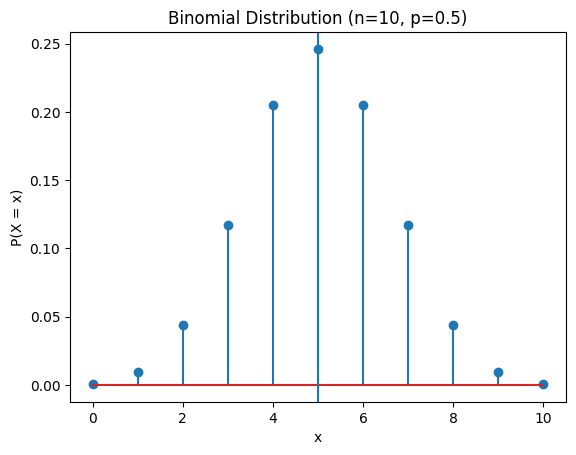

In [19]:
from math import comb

n = 10
p = 0.5

x = np.arange(0, n + 1)
pmf = np.array([comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in x])
E = np.sum(x * pmf)

plt.stem(x, pmf)
plt.axvline(E)
plt.title("Binomial Distribution (n=10, p=0.5)")
plt.xlabel("x")
plt.ylabel("P(X = x)")
plt.show()


In [10]:
# Geometric Random Variable
# Meaning: Number of trials until the first success
# Example: How many coin flips until first head?

p = 0.25  # probability of success

samples = np.random.geometric(p, size=100_000)

print("\nGeometric")
print("Theoretical E[X] =", 1 / p)
print("Simulated mean  =", samples.mean())



Geometric
Theoretical E[X] = 4.0
Simulated mean  = 4.00798


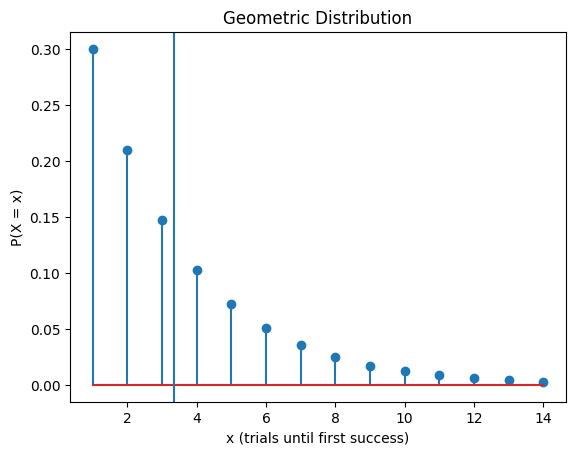

In [20]:
p = 0.3
x = np.arange(1, 15)
pmf = (1 - p) ** (x - 1) * p
E = 1 / p

plt.stem(x, pmf)
plt.axvline(E)
plt.title("Geometric Distribution")
plt.xlabel("x (trials until first success)")
plt.ylabel("P(X = x)")
plt.show()


In [11]:
# Expected Value of a Function (Expected Value Rule)

# X ~ Uniform {1,2,3,4,5,6}
samples = np.random.randint(1, 7, size=100_000)

print("\nExpected Value Rule")
print("E[X^2] (simulated) =", np.mean(samples**2))
print("(E[X])^2          =", np.mean(samples)**2)



Expected Value Rule
E[X^2] (simulated) = 15.17693
(E[X])^2          = 12.2552505625


In [12]:
# Linearity of Expectation (Most Important Property)

a = 2
b = 100

X = np.random.randint(1, 7, size=100_000)
Y = a * X + b

print("\nLinearity of Expectation")
print("E[aX + b] (simulated) =", Y.mean())
print("aE[X] + b             =", a * X.mean() + b)



Linearity of Expectation
E[aX + b] (simulated) = 107.00166
aE[X] + b             = 107.00166
